In [50]:
from scipy import stats
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import json
import os
import random

# India vs Japan Similarity Correlation

In [60]:
# shuffle one of the two arrays with n permutations
def permutations(a, b, statistic, n):
    p_values = []
    for i in range(n):
        c = random.sample(b, len(b))
        if(len(a)==len(c)):
            r, p = sp.pearsonr(a,c)
            if(r>statistic):
                p_values.append(p)
        else:
            print("Error! array lengths are not the same")
            return
    return p_values

In [124]:
def flatten_distance_matrix(numpy_array, *args):
    arr = []
    labels = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
                labels.append(str(args[0]*5+i)+","+str(args[0]*5+j))
    return arr, labels

In [220]:
PATH = './output/japan/similarity/'
japanese_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x,y = flatten_distance_matrix(npar, i)
    japanese_pairwise.extend(x)
japanese_pairwise = [x/100 for x in japanese_pairwise]

In [221]:
PATH = './output/india/pairwise/'

indian_pairwise = []
labels = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_all.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5], i)
    indian_pairwise.extend(x)
    labels.extend(y)
indian_pairwise = [1- (x / 100) for x in indian_pairwise]

In [222]:
## Japan vs India Correlation
a = japanese_pairwise
b = indian_pairwise
n = 1000
r, p = sp.pearsonr(a,b)
statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
print(r, sig, n)

0.8038960671468731 0.000999000999000999 1000


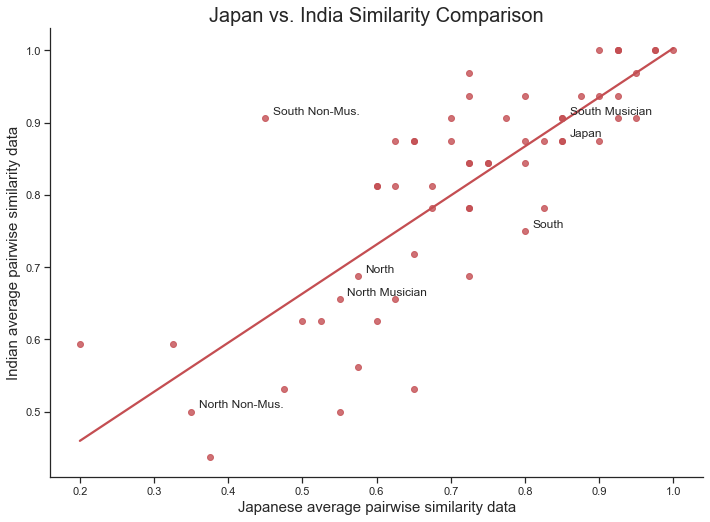

In [661]:
from adjustText import adjust_text
## Japan vs India Plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
p = sns.regplot(x=japanese_pairwise, y=indian_pairwise, ci=None, color="r")
p.set_xlabel("Japanese average pairwise similarity data", fontsize = 15)
p.set_ylabel("Indian average pairwise similarity data", fontsize = 15)
p.set_title("Japan vs. India Similarity Comparison", fontsize = 20)

texts = []
for i, label in enumerate (labels):
#     p.text(japanese_pairwise[i]+0.01, indian_pairwise[i]+0.001, label)
    texts.append(p.text(japanese_pairwise[i]+0.01, indian_pairwise[i]+0.001, label))
    
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
sns.despine()  
plt.savefig('./figs/india-japan-correlation.png')
# https://stackoverflow.com/questions/46027653/adding-labels-in-x-y-scatter-plot-with-seaborn

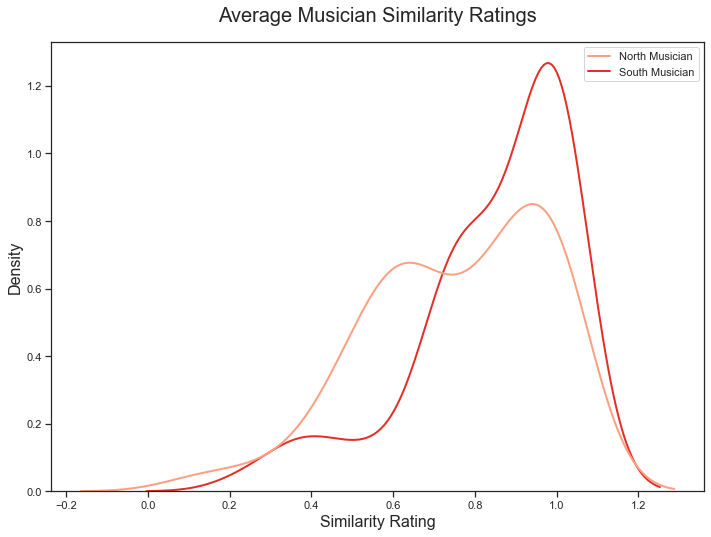

In [298]:
df = pd.DataFrame({'North Musician': north_musician, 'South Musician': south_musician}, columns=['North Musician', 'South Musician'])
ax = sns.kdeplot(data = df, fill=False, palette='Reds',linewidth=2)
plt.xlabel("Similarity Rating", fontsize=16)
plt.ylabel("Density", fontsize=16)
ax.set_title("Average Musician Similarity Ratings",fontsize=20, pad=20)
plt.savefig('./figs/musician_hist.png')

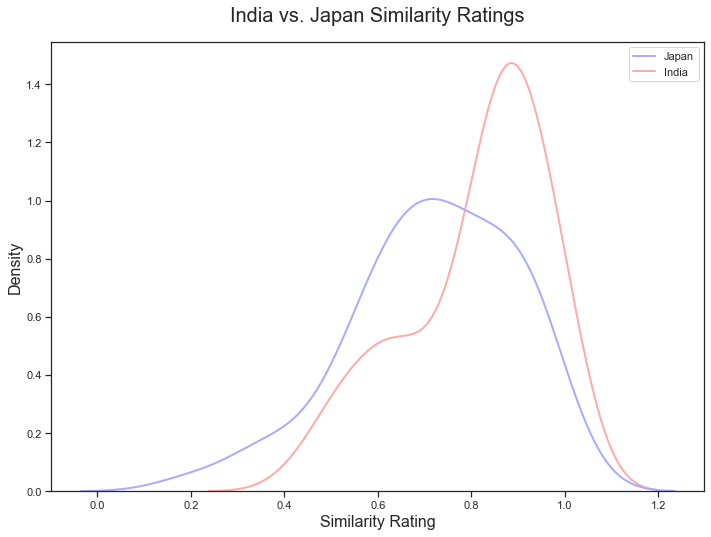

In [300]:
df = pd.DataFrame({'Japan': japanese_pairwise, 'India': indian_pairwise}, columns=['Japan', 'India'])
ax = sns.kdeplot(data = df, fill=False, palette='bwr', linewidth=2)
plt.xlabel("Similarity Rating", fontsize=16)
plt.ylabel("Density", fontsize=16)
ax.set_title("India vs. Japan Similarity Ratings",fontsize=20, pad=20)
plt.savefig('./figs/india_japan_hist.png')

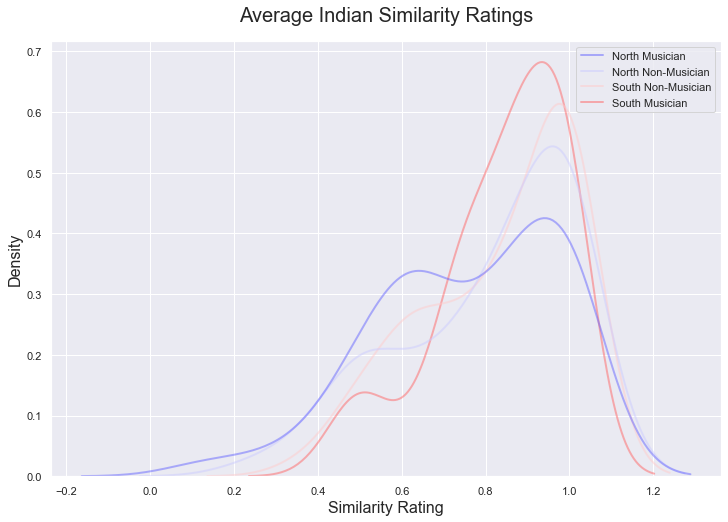

In [660]:
df = pd.DataFrame({'North Musician': north_musician, 'North Non-Musician':north_non , 'South Non-Musician': south_non, 'South Musician': south_musician}, columns=['North Musician', 'North Non-Musician', 'South Non-Musician', 'South Musician'])
ax = sns.kdeplot(data = df, fill=False, alpha=.5, palette='bwr', linewidth=2)
plt.xlabel("Similarity Rating", fontsize=16)
plt.ylabel("Density", fontsize=16)
ax.set_title("Average Indian Similarity Ratings",fontsize=20, pad=20)
plt.savefig('./figs/india_hist.png')

In [ ]:
df = pd.DataFrame({'North Non-Musician':north_non , 'South Non-Musician': south_non}, columns=['North Non-Musician', 'South Non-Musician'])
ax = sns.kdeplot(data = df, fill=True, alpha=.5, palette='PiYG', linewidth=2)
plt.xlabel("Similarity Rating", fontsize=16)
plt.ylabel("Density", fontsize=16)
ax.set_title("Average Non-Musician Similarity Ratings",fontsize=20, pad=20)
plt.savefig('./figs/non-musician-hist.png')

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

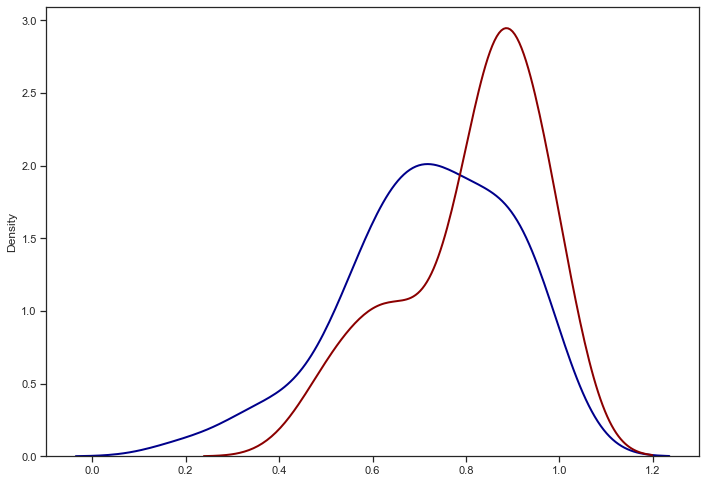

In [158]:
sns.distplot(japanese_pairwise, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'none'},
             kde_kws={'linewidth': 2})
sns.distplot(indian_pairwise, hist=False, kde=True, 
             bins=int(180/5), color = 'darkred', 
             hist_kws={'edgecolor':'none'},
             kde_kws={'linewidth': 2})

In [65]:
def flatten_distance_matrix(numpy_array):
    arr = []
    labels = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
#                 labels.append(str(args[0]*5+i)+","+str(args[0]*5+j))
    return arr

## India Japan Correlation

0.24662389302015125 0.001761473870231701 1000


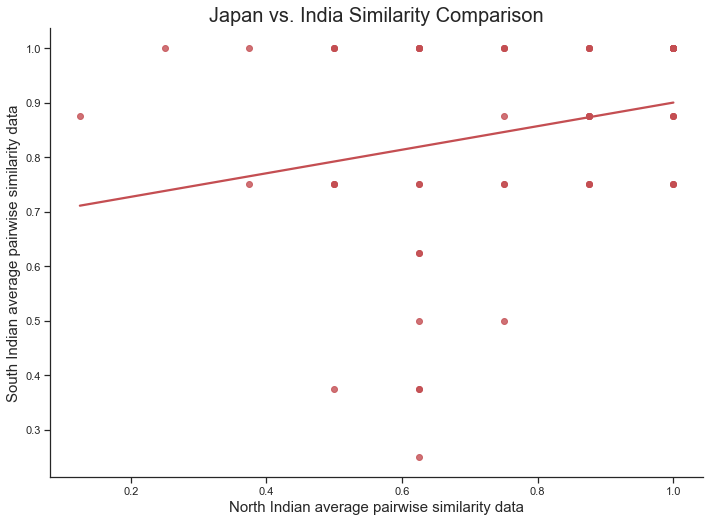

In [156]:
PATH = './output/india/pairwise/'

north_musician = []
labels = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    labels.extend(y)
    north_musician.extend(x)

north_musician = [1- (x / 100) for x in north_musician]
south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)
south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = north_musician
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)

# Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
print(r, sig, n)

from adjustText import adjust_text
## Japan vs India Plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('ticks')
p = sns.regplot(x=north_musician, y=south_musician, ci=None, color="r")
p.set_xlabel("North Indian average pairwise similarity data", fontsize = 15)
p.set_ylabel("South Indian average pairwise similarity data", fontsize = 15)
p.set_title("Japan vs. India Similarity Comparison", fontsize = 20)
sns.despine()  
plt.savefig('./figs/northmusic-southmusic-notext.png')

In [330]:
correlations = np.zeros((6,6))
# Rows
#North Musician = 0
#South Musician = 1
#North Non = 2
#South Non = 3
#South = 4
#Japan = 5

# Columns
#North Musician = 0
#South Musician = 1
#North Non = 2
#South Non = 3
#North = 4
#South = 5

# p-value = i, j
# r = j,i

In [334]:
def calculate_correlation(matrix_a, matrix_b):
    PATH = './output/india/pairwise/'
    a = []
    b = []
    for i in range(6):
        npar = pd.read_csv(PATH+matrix_a+'.csv').to_numpy()
        x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5], i)
        a.extend(x)
    a = [1- (x / 100) for x in a]

    for i in range(6):
        npar = pd.read_csv(PATH+matrix_b+'.csv').to_numpy()
        x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5], i)
        b.extend(x)
    b = [1- (x / 100) for x in b]

    ## Japan vs India Correlation

    n = 1000
    r, p = sp.pearsonr(a,b)
    statistic = r
    results = permutations(list(a),list(b),statistic, n)
    Sum_p = sum(results)
    sig = (Sum_p+1)/(n+1)
    return r, sig

In [337]:
r, p = calculate_correlation('full_north_musician', 'full_south_musician')
correlations[1,0] = round(r,2)
correlations[0,1] = round(p,4)

r, p = calculate_correlation('full_north_musician', 'full_north_non')
correlations[2,0] = round(r,2)
correlations[0,2] = round(p,4)

r, p = calculate_correlation('full_south_musician', 'full_north_non')
correlations[2,1] = round(r,2)
correlations[1,2] = round(sig,4)

r, p = calculate_correlation('full_north_musician', 'full_south_non')
correlations[3,0] = round(r,2)
correlations[0,3] = round(sig,4)

r, p = calculate_correlation('full_south_musician', 'full_south_non')
correlations[3,1] = round(r,2)
correlations[1,3] = round(sig,4)

r, p = calculate_correlation('full_north_non', 'full_south_non')
correlations[3,2] = round(r,2)
correlations[2,3] = round(sig,4)

r, p = calculate_correlation('full_north_musician', 'full_north')
correlations[4,0] = round(r,2)
correlations[0,4] = round(sig,4)

r, p = calculate_correlation('full_south_musician', 'full_north')
correlations[4,1] = round(r,2)
correlations[1,4] = round(sig,4)

r, p = calculate_correlation('full_north_non', 'full_north')
correlations[4,2] = round(r,2)
correlations[2,4] = round(sig,4)

r, p = calculate_correlation('full_south_non', 'full_north')
correlations[4,3] = round(r,2)
correlations[3,4] = round(sig,4)

r, p = calculate_correlation('full_north_musician', 'full_south')
correlations[5,0] = round(r,2)
correlations[0,5] = round(sig,4)

r, p = calculate_correlation('full_south_musician', 'full_south')
correlations[5,1] = round(r,2)
correlations[1,5] = round(sig,4)

r, p = calculate_correlation('full_north_non', 'full_south')
correlations[5,2] = round(r,2)
correlations[2,5] = round(sig,4)

r, p = calculate_correlation('full_north', 'full_south')
correlations[5,3] = round(r,2)
correlations[3,5] = round(sig,4)

r, p = calculate_correlation('full_north', 'full_south')
correlations[5,4] = round(r,2)
correlations[4,5] = round(sig,4)

In [350]:
correl_2 = np.zeros((7,7))
correl_2[:6,:6] = correlations
correl_2[6,6] = None
south_musician = []
PATH = './output/india/pairwise/'
for i in range(6):
    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,0] = round(r,2)
correl_2[0,6] = round(sig,4)


south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,1] = round(r,2)
correl_2[1,6] = round(sig,4)


south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north_non.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,2] = round(r,2)
correl_2[2,6] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south_non.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,3] = round(r,2)
correl_2[3,6] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_north.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,4] = round(r,2)
correl_2[4,6] = round(sig,4)

south_musician = []

for i in range(6):
    npar = pd.read_csv(PATH+'full_south.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    south_musician.extend(x)

south_musician = [1- (x / 100) for x in south_musician]

## Japan vs India Correlation

a = japanese_pairwise
b = south_musician
n = 1000
r, p = sp.pearsonr(a,b)

statistic = r
results = permutations(list(a),list(b),statistic, n)
Sum_p = sum(results)
sig = (Sum_p+1)/(n+1)
correl_2[6,5] = round(r,2)
correl_2[5,6] = round(sig,4)
correl_2[6,6] = 0

In [351]:
for i in range(7):
    for j in range(7):
        if i==j:
            correl_2[i,j]=None

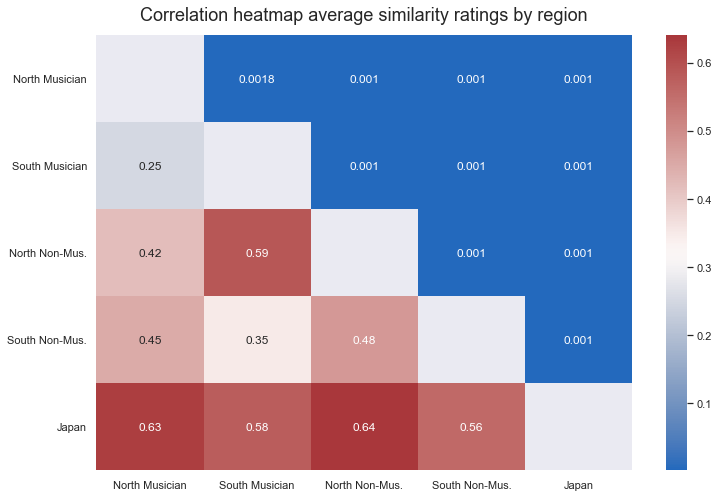

In [352]:
labels = ['North Musician','South Musician', 'North Non-Mus.','South Non-Mus.', 'North', 'South','Japan' ]
df2 = pd.read_csv('./output/analysis/correlation.csv', index_col=[0])
# df2 = pd.DataFrame(correl_2, columns=labels, index=labels)
# df2 = df2.drop(['North','South'])
# df2 = df2.drop(['North','South'], axis = 1)
# df2.to_csv('./output/analysis/correlation.csv')
cmap = sns.color_palette("vlag", as_cmap=True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(df2, annot=True, cmap=cmap)
plt.yticks(rotation=0) 
plt.xticks(rotation=0)
plt.title('Correlation heatmap average similarity ratings by region', fontsize=18, pad=15)
plt.savefig('./figs/heatmap.png')

## Correlations

In [38]:
PATH = './output/india/pairwise/'

def correlation(category, label, title):
    a = []
    b = []
    for i in range(6):
        npar = pd.read_csv(PATH+'full_'+category[0]+'.csv').to_numpy()
        x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
        a.extend(x)
    a = [1- (x / 100) for x in a]
                           
    for i in range(6):
        npar = pd.read_csv(PATH+'full_'+category[1]+'.csv').to_numpy()
        x = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5])
        b.extend(x)
    b = [1- (x / 100) for x in b]
    n = 1000
    r, p = sp.pearsonr(a,b)
    statistic = r
    results = permutations(list(a),list(b),statistic, n)
    Sum_p = sum(results)
    sig = (Sum_p+1)/(n+1)
    # Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
    print(r, sig, n)
                           
    ## Japan vs India Plot
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_style('ticks')
    p = sns.regplot(x=a, y=b, ci=None, color="b")
    p.set_xlabel(label[0], fontsize = 15)
    p.set_ylabel(label[1], fontsize = 15)
    p.set_title(title, fontsize = 20)
    sns.despine()  

## Feature 

In [313]:
PATH = './output/japan/similarity/'
japanese_pairwise = []
for i in range(6):
    npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
    x,y = flatten_distance_matrix(npar,i)
    japanese_pairwise.extend(x)
japanese_pairwise = [x/100 for x in japanese_pairwise]

In [314]:
PATH = './output/japan/feature/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
results = pd.DataFrame(columns=['r_india', 'p_india', 'r_japan','p_japan'], index=feature_names)
full_partial = pd.read_csv('./output/japan/feature/ornamentation_average.csv')
for i in range(1, len(feature_names)+1):
    label = feature_names[i-1].lower().replace(' ', '_')
    npar = pd.read_csv(PATH+label+'_average.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened,y = flatten_distance_matrix(npar[j:j+5, j:j+5],j)
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, japanese_pairwise)
    x = [feature_names[i-1], r,p]
    results.loc[feature_names[i-1], 'r_japan'] = round(r,2)
    results.loc[feature_names[i-1], 'p_japan'] = round(p,2)

In [315]:
PATH = './output/india/pairwise/'

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_all.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_full.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened,y = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5],j)
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    results.loc[feature_names[i-1], 'r_india'] = round(r,2)
    results.loc[feature_names[i-1], 'p_india'] = round(p,2)
results.to_csv('./output/analysis/feature_pairwise.csv')

## Feature Pairwise Musician

In [318]:
PATH = './output/india/pairwise/'
results = pd.DataFrame(columns=['r_musician', 'r_non_musician','p_musician','p_non_musician'], index=feature_names)

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5], i)
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_musician.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened, y = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5], j)
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    results.loc[feature_names[i-1], 'r_musician'] = round(r,2)
    results.loc[feature_names[i-1], 'p_musician'] = round(p,2)

## Feature Pairwise Non-Musician

In [319]:
PATH = './output/india/pairwise/'

indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_non.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_non_musician.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened,y = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5],j)
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    results.loc[feature_names[i-1], 'r_non_musician'] = round(r,2)
    results.loc[feature_names[i-1], 'p_non_musician'] = round(p,2)

In [320]:
results.to_csv('./output/analysis/musician_feature_pairwise.csv')

## Feature Pairwise North Musician South Musician

In [326]:
results = pd.DataFrame(columns=['r_north_musician', 'r_south_musician','p_north_musician','p_south_musician'], index=feature_names)

PATH = './output/india/pairwise/'
indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_north_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_north_musician.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened,y = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5],j)
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    results.loc[feature_names[i-1], 'r_north_musician'] = round(r,2)
    results.loc[feature_names[i-1], 'p_north_musician'] = round(p,2)

PATH = './output/india/pairwise/'
indian_partial = []
for i in range(6):
    npar = pd.read_csv(PATH+'full_south_musician.csv').to_numpy()
    x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5],i)
    indian_partial.extend(x)

indian_partial = [1- (x / 100) for x in indian_partial]

PATH = './output/india/feature-distance/'
feature_names = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range', 'Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
labels = [x.lower().replace(' ', '_') for x in feature_names]
for i in range(0, len(labels)):
    label = labels[i]
    npar = pd.read_csv(PATH+label+'_south_musician.csv').to_numpy()
    flattened_feature = []
    for j in range(6):
        flattened,y = flatten_distance_matrix(npar[j*5:(j*5)+5, j*5:(j*5)+5],j)
        flattened_feature.extend(flattened)
    r, p = stats.pearsonr(flattened_feature, indian_partial)
    results.loc[feature_names[i-1], 'r_south_musician'] = round(r,2)
    results.loc[feature_names[i-1], 'p_south_musician'] = round(p,2)

In [328]:
results.to_csv('./output/analysis/north_south_musician_feature_pairwise.csv')

## Inter Rater Reliability

In [558]:
def flatten_individual(x):
    r = []
    for i in range(5):
        for j in range(5):
            if i<j:
                r.append(x[i,j])
                
    return r

In [654]:
from sklearn.metrics import cohen_kappa_score

def calculate_kappa(path, raters):
    a = pd.read_csv(PATH+raters[0]+'.csv').fillna(100).to_numpy()
    a = flatten_individual(a)
    b = pd.read_csv(PATH+raters[1]+'.csv').fillna(100).to_numpy()
    b = flatten_individual(b)
    return round(cohen_kappa_score(a, b, labels=[0, 25, 50, 75, 100], weights='quadratic'),2)

In [655]:
def get_id(g, c, region):
    raters = []
    for person in region:
        raters.append(str(g)+person+c+str(g)) 
    return raters

def res_kappa(path, c,r, label):
    res = []
    for i in range(6):
        raters = get_id(i, c, r)
        kappa = calculate_kappa(path, raters)
        res.append((kappa, label, i))
    return res

In [656]:
PATH = './output/india/pairwise/'
north = ['A', 'B']
south = ['C', 'D']

d = res_kappa(PATH, 'X', north, "North Musician")
d.extend(res_kappa(PATH, 'Y', north, "North Non-Musician"))
d.extend(res_kappa(PATH, 'X', south, "South Musician"))
d.extend(res_kappa(PATH, 'Y', south, "South Non-Musician"))
kappa_pair = pd.DataFrame(d, columns=['kappa', 'region', 'group'])

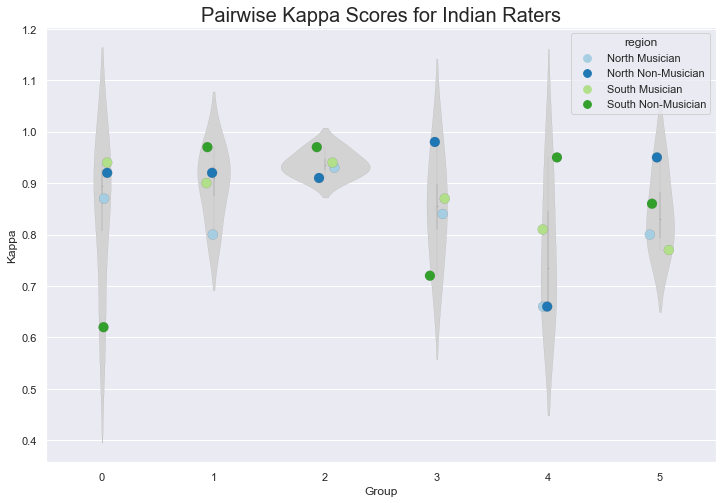

<Figure size 864x576 with 0 Axes>

In [657]:
sns.violinplot(x="group", y="kappa", color="lightgray", data=kappa_pair, alpha=0.5, jitter=1, linewidth=0.1)
sns.stripplot(x="group", y="kappa", hue='region', palette="Paired", data=kappa_pair, size=10, linewidth=0.1)
plt.xlabel("Group")
plt.ylabel("Kappa")
plt.title("Pairwise Kappa Scores for Indian Raters", fontsize=20)
plt.show()
plt.savefig("./figs/pairkappa-india.png")

In [583]:
PATH = './output/india/feature/raw/'
north = ['A', 'B']
south = ['C', 'D']

d = res_kappa(PATH,'X', north, "North Musician")
# d.extend(res_kappa(PATH,'Y', north, "North Non-Musician"))
# d.extend(res_kappa(PATH,'X', south, "South Musician"))
# # d.extend(res_kappa(PATH,'Y', south, "South Non-Musician"))
# kappa_pair = pd.DataFrame(d, columns=['kappa', 'region', 'group'])

In [584]:
pd.read_csv(PATH+'0AX0.csv', index_col=0)['overlap'].to_numpy()

array([100, 100,   0, 100,   0])

In [585]:
def res_kappa_feature(path, c,r, label, feature):
    res = []
    for i in range(6):
        raters = get_id(i, c, r)
        kappa = calculate_kappa_feat(path, raters, feature)
        res.append((kappa, label, feature, i))
    return res

def calculate_kappa_feat(path, raters, feature):
    a = pd.read_csv(PATH+raters[0]+'.csv')[feature].to_numpy()
    b = pd.read_csv(PATH+raters[1]+'.csv')[feature].to_numpy()
    k = round(cohen_kappa_score(a, b, labels=[0, 50, 100], weights='quadratic'),2)
    return k

In [586]:
print([feature for feature in features])

['overlap', 'creativity', 'likeness', 'tempo', 'consonance', 'emotion', 'decoration', 'range', 'quality', 'rhythm', 'excitingness', 'groove', 'timbre']


In [594]:
result = []
columns = pd.read_csv(PATH+'0AX0.csv').columns
features = columns.drop(['song_id', 'edited'])
for featu1re in features:
    result.extend(res_kappa_feature(PATH,'X', north, "North Musician", feature))
    result.extend(res_kappa_feature(PATH,'Y', north, "North Non-Musician", feature))
    result.extend(res_kappa_feature(PATH,'X', south, "South Musician", feature))
    result.extend(res_kappa_feature(PATH,'Y', south, "South Non-Musician", feature))

/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/opt/homebrew/lib/python3.9/site-packages/sklearn/metrics/_classification.py:663: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/opt/homeb

In [602]:
kappa_feat = pd.DataFrame(result, columns=['kappa', 'region', 'feature', 'group']).fillna(0)
kappa_feat.to_csv('./output/analysis/feature_kappa_india.csv')

In [640]:
df = pd.read_csv('./output/analysis/feature_kappa_india_edited.csv', index_col=0)
aesthetic = ['Ornamentation', 'Grooviness', 'Familiarity', 'Liking', 'Consonance', 'Valence', 'Excitement', 'Vocal Range']
stylistic = ['Sound Quality', 'Tempo', 'Rhythmic Regularity', 'Vocal Tension', 'Vocal Texture']
df_s = df[~df['feature'].isin(aesthetic)]
df_a = df[~df['feature'].isin(stylistic)]

In [648]:
df = pd.concat([df_a,df_s], ignore_index=True)

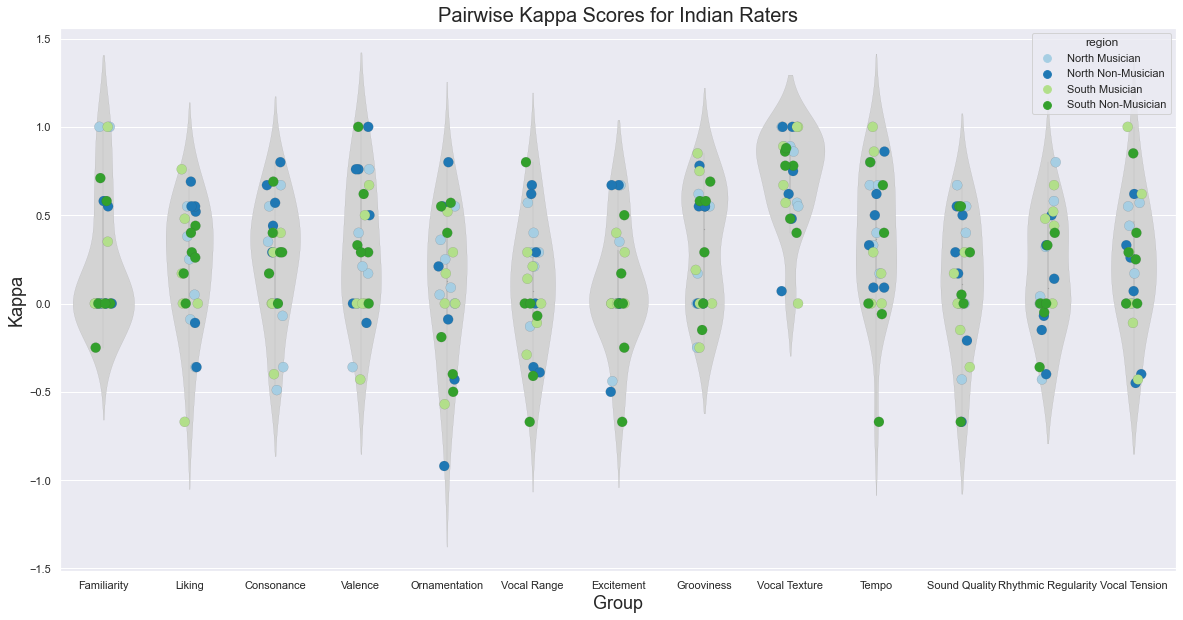

<Figure size 864x576 with 0 Axes>

In [659]:
plt.figure(figsize=(20,10))
sns.violinplot(x="feature", y="kappa", color="lightgray", data=df, alpha=0.5, linewidth=0.1)
sns.stripplot(x="feature", y="kappa", hue="region", palette="Paired", data=df, size=10, linewidth=0.1)
plt.xlabel("Group", fontsize=18)
plt.ylabel("Kappa", fontsize=18)
plt.title("Pairwise Kappa Scores for Indian Raters", fontsize=20)
plt.show()
plt.savefig("./figs/featurekappa-india.png")

In [662]:
df = pd.read_csv('./output/analysis/feature_kappa_india_edited.csv', index_col=0)
df.groupby('region').mean()

,kappa,group
region,,
North Musician,0.279359,2.5
North Non-Musician,0.265256,2.5
South Musician,0.208718,2.5
South Non-Musician,0.217821,2.5


In [692]:
mean_kappa = df.groupby('feature').mean().drop(columns=["group"]).round(2)
mean_kappa.to_csv('./output/analysis/mean-kappa.csv')

## Feature PCA

In [693]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [738]:
PATH = './output/india/bollywood/'
metadata = pd.read_csv(PATH+'song-metadata.csv')

In [791]:
metadata.columns

Index(['Song ID', 'Code', 'Song name', 'Language', 'Group', 'Genre',
       'Category'],
      dtype='object')

In [811]:
PATH = './output/india/bollywood/'
df = pd.read_csv(PATH+'full_all.csv')
metadata = pd.read_csv(PATH+'song-metadata.csv')
pca = PCA(n_components=2)
components = pca.fit_transform(df)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(components, x=0, y=1,color=metadata['Genre'], symbol=metadata['Language'], labels={
                     "0": "PC1: Vocal and Instrumental Complexity",
                     "1": "PC2: Familiarity and Consonance",
                     "color": "Language"
                 },
                 title='Two Dimensional PCA of Bollywood Data',
                 text=metadata['Song ID'],
                )
fig.update_traces(marker_size=10, textposition='middle right')
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False) 
fig.show()

In [772]:
loadings_df = pd.DataFrame()
loadings_df = round(pd.DataFrame(loadings),2)
features = pd.DataFrame(df.columns, columns=['feature'])
loadings_df = pd.concat([features, loadings_df], axis=1)

In [773]:
loadings_df = loadings_df.rename({0:'PC1', 1:'PC2'}, axis=1)
loadings_df.sort_values(by=['PC1'])

,feature,PC1,PC2
12,vocal_texture,2.66,-6.13
13,instrument_vocal_overlap,3.30,-0.85
15,instrument_tone_blend,3.49,2.62
2,familiarity,5.05,15.36
7,sound_quality,5.19,3.54
11,vocal_tension,5.28,-0.99
9,rhythmic_regularity,5.47,1.73
4,consonance,5.53,8.37
16,instrument_rhythm_blend,5.91,3.24
14,instrument_overlap,6.35,0.65


In [780]:
loadings_df.reindex(loadings_df['PC2'].abs().sort_values(ascending=False).index)

,feature,PC1,PC2
2,familiarity,5.05,15.36
4,consonance,5.53,8.37
1,grooviness,18.27,-7.43
8,tempo,11.74,-6.65
3,liking,7.34,6.21
12,vocal_texture,2.66,-6.13
6,excitement,16.52,-5.75
10,vocal_range,8.08,5.62
0,ornamentation,8.22,4.73
7,sound_quality,5.19,3.54


In [820]:
PATH = './output/india/bollywood/'
df = pd.read_csv(PATH+'full_all.csv')
metadata = pd.read_csv(PATH+'song-metadata.csv')
pca = PCA(n_components=3)
components = pca.fit_transform(df)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter_3d(components, x=0, y=1,z=2, color=metadata['Genre'], symbol=metadata['Language'], labels={
                     "0": "PC1: Vocal and Instrumental Complexity",
                     "1": "PC2: Familiarity",
                     "2": "PC3: Timbral Complexity",
                     "color": "Language"
                 },
                 title='Two Dimensional PCA of Bollywood Data',
                 text=metadata['Song ID'],
                )
fig.update_traces(marker_size=10, textposition='middle right')
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False) 
fig.show()

In [817]:
loadings_df = pd.DataFrame()
loadings_df = round(pd.DataFrame(loadings),2)
features = pd.DataFrame(df.columns, columns=['feature'])
loadings_df = pd.concat([features, loadings_df], axis=1)
loadings_df = loadings_df.rename({0:'PC1', 1:'PC2', 2:'PC3'}, axis=1)
loadings_df.sort_values(by=['PC3'])
loadings_df.reindex(loadings_df['PC3'].abs().sort_values(ascending=False).index)

,feature,PC1,PC2,PC3
13,instrument_vocal_overlap,3.30,-0.85,8.36
0,ornamentation,8.22,4.73,6.46
11,vocal_tension,5.28,-0.99,5.49
10,vocal_range,8.08,5.62,5.08
5,valence,10.34,1.85,-4.29
15,instrument_tone_blend,3.49,2.62,-4.04
9,rhythmic_regularity,5.47,1.73,-3.95
4,consonance,5.53,8.37,-3.79
16,instrument_rhythm_blend,5.91,3.24,-3.70
2,familiarity,5.05,15.36,3.07
